___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Supervised Learning Capstone Project - Tree Methods Focus 



## Make sure to review the introduction video to understand the 3 ways of approaching this project exercise!

----

**Ways to approach the project:**
   1. Open a new notebook, read in the data, and then analyze and visualize whatever you want, then create a predictive model.
   2. Use this notebook as a general guide, completing the tasks in bold shown below.
   3. Skip to the solutions notebook and video, and treat project at a more relaxing code along walkthrough lecture series.

------
------

## GOAL: Create a model to predict whether or not a customer will Churn .

----
----


## Complete the Tasks in Bold Below!

## Part 0: Imports and Read in the Data

**TASK: Run the filled out cells below to import libraries and read in your data. The data file is "Telco-Customer-Churn.csv"**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1: Quick Data Check

**TASK: Confirm quickly with .info() methods the datatypes and non-null values in your dataframe.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**TASK: Get a quick statistical summary of the numeric columns with .describe() , you should notice that many columns are categorical, meaning you will eventually need to convert them to dummy variables.**

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


# Part 2:  Exploratory Data Analysis

## General Feature Exploration

**TASK: Confirm that there are no NaN cells by displaying NaN values per feature column.**

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**TASK:Display the balance of the class labels (Churn) with a Count Plot.**

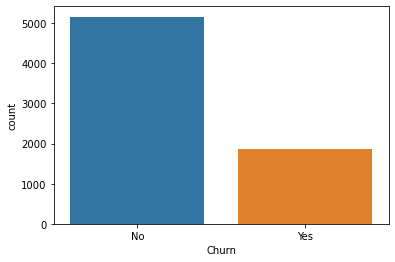

In [7]:
sns.countplot(data=df, x='Churn');

In [8]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

**TASK: Explore the distrbution of TotalCharges between Churn categories with a Box Plot or Violin Plot.**

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

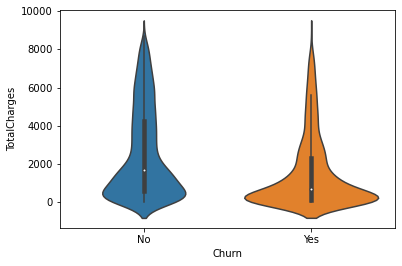

In [9]:
sns.violinplot(x='Churn', y='TotalCharges', data=df)

**TASK: Create a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class.**

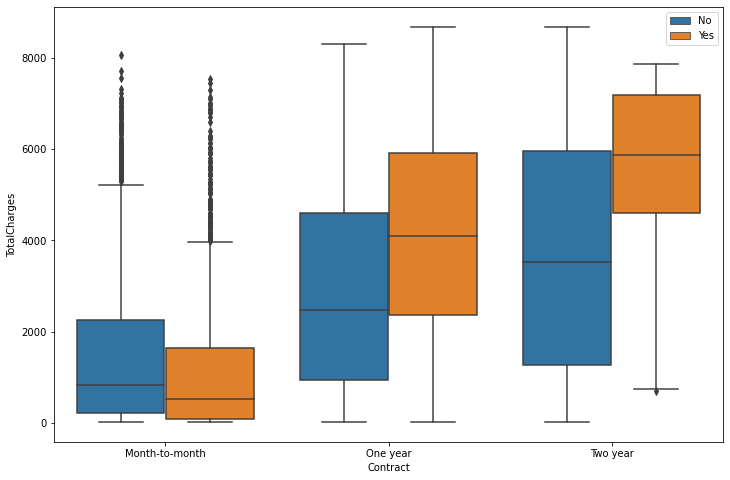

In [10]:
plt.figure(figsize=(12,8))
sns.boxplot(y='TotalCharges', x='Contract', data=df, hue='Churn')
plt.legend(bbox_to_anchor=(1,1))

**TASK: Create a bar plot showing the correlation of the following features to the class label. Keep in mind, for the categorical features, you will need to convert them into dummy variables first, as you can only calculate correlation for numeric features.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Note, we specifically listed only the features above, you should not check the correlation for every feature, as some features have too many unique instances for such an analysis, such as customerID***

In [11]:
colm_select = ['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [12]:
# create dummy variables
df_corr = pd.get_dummies(data=df, columns=colm_select, drop_first=True)

In [13]:
correlations = pd.DataFrame(data=df_corr.corr()['Churn_Yes'].sort_values()[:-1])

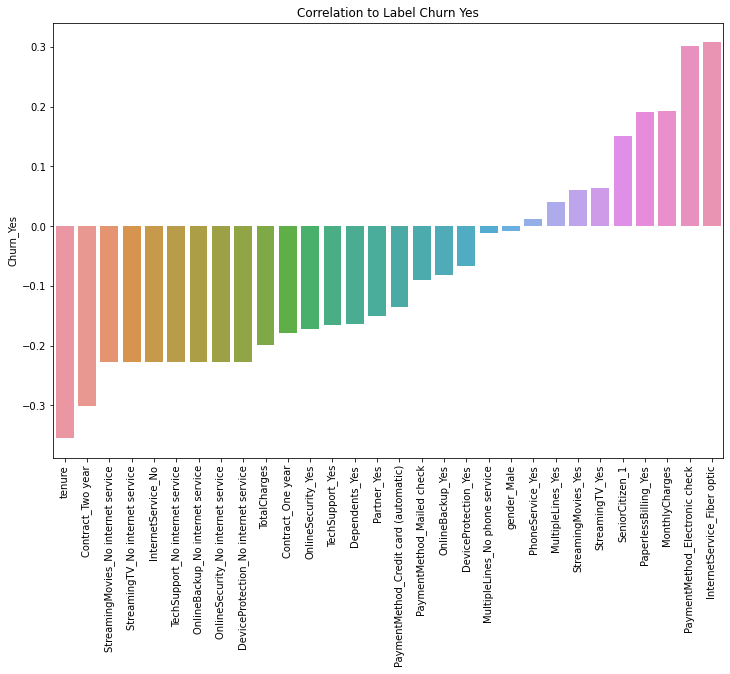

In [14]:
plt.figure(figsize=(12,8))
sns.barplot(x=correlations.index, y=correlations['Churn_Yes'])
plt.title('Correlation to Label Churn Yes')
plt.xticks(rotation=90);

---
---

# Part 3: Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

**TASK: What are the 3 contract types available?**

In [15]:
df['Contract'].value_counts().index

Index(['Month-to-month', 'Two year', 'One year'], dtype='object')

**TASK: Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

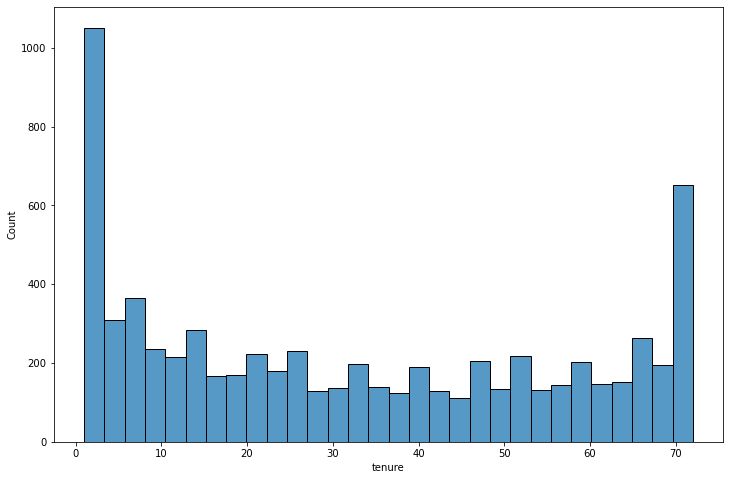

In [16]:
plt.figure(figsize=(12,8))
sns.histplot(df['tenure'],bins=30);

**TASK: Now use the seaborn documentation as a guide to create histograms separated by two additional features, Churn and Contract.**

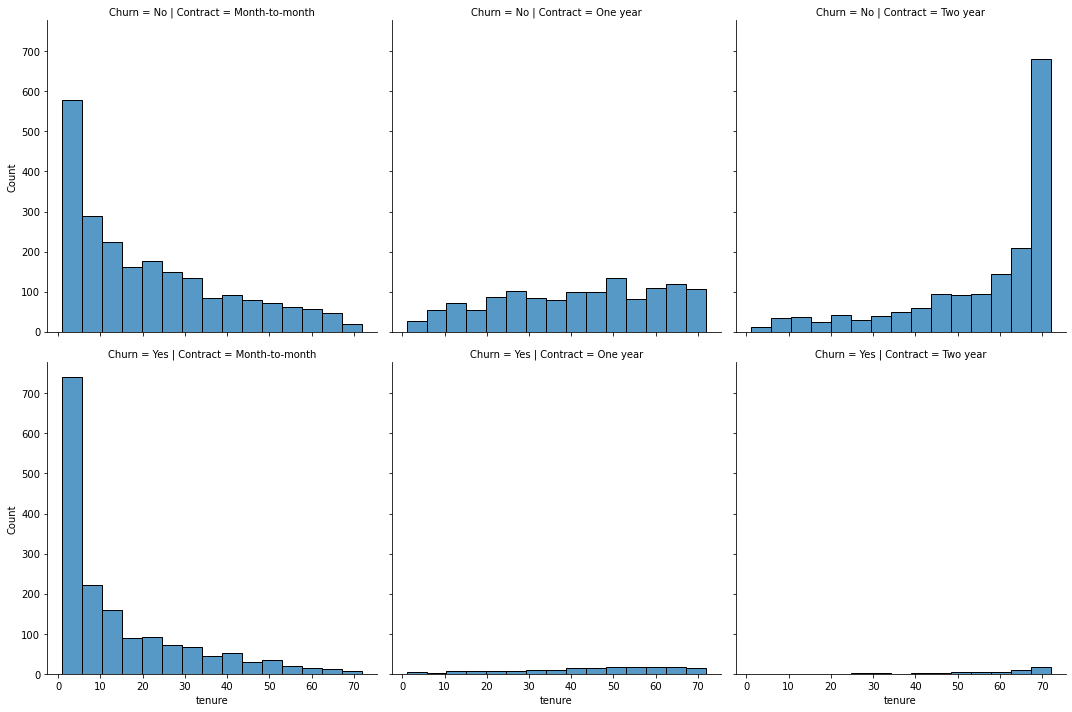

In [17]:
sns.displot(data=df, x='tenure', row='Churn', col='Contract')

In [18]:
#df[['tenure', 'Churn', 'Contract']].groupby(['Churn', 'Contract']).hist()
#plt.tight_layout()

**TASK: Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

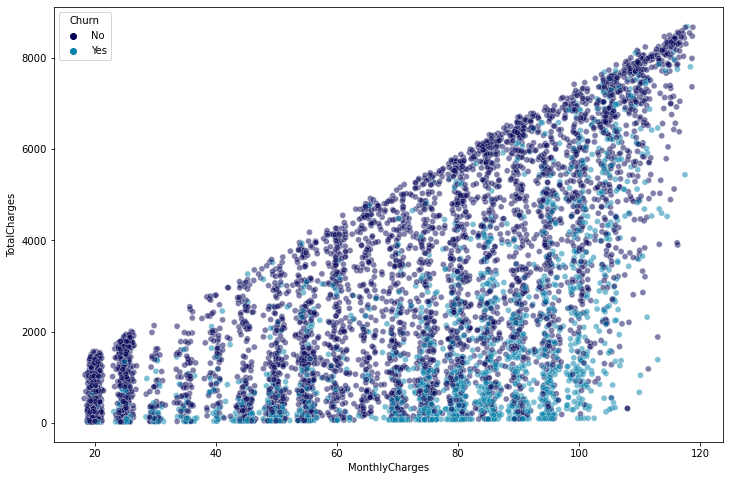

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df, hue='Churn', palette='ocean', alpha=0.5, linewidth=0.5);

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**TASK: Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [20]:
#CODE HEREdf['tenure'].describe()

In [21]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [22]:
only_yes = df[df['Churn'] == 1].groupby('tenure')['Churn'].sum()
total = df.groupby('tenure')['Churn'].count()

In [23]:
churn_rates = only_yes / total * 100

**TASK: Now that you have Churn Rate per tenure group 1-72 months, create a plot showing churn rate per months of tenure.**

Text(0, 0.5, 'churn rates')

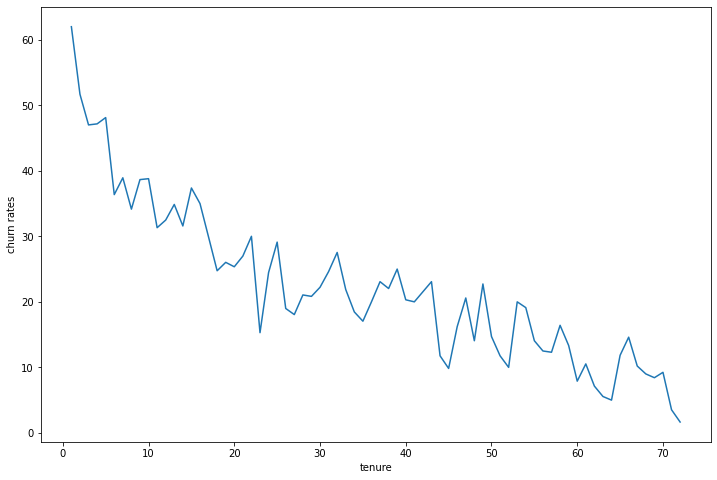

In [24]:
plt.figure(figsize=(12,8))
sns.lineplot(x=churn_rates.index, y=churn_rates.values)
plt.ylabel('churn rates')

### Broader Cohort Groups
**TASK: Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [25]:
#df = df.drop('tenure months', axis=1)

In [26]:
def create_tenure_bins(m):
    if m <= 12:
        return '0-12 Months'
    elif m > 12 and m <= 24:
        return '12-24 Months'
    elif m > 24 and m <= 48:
        return '24-48 Months'
    else:
        return 'over 48 Months'

In [27]:
df['tenure cohort'] = df['tenure'].map(lambda m: create_tenure_bins(m))

**TASK: Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

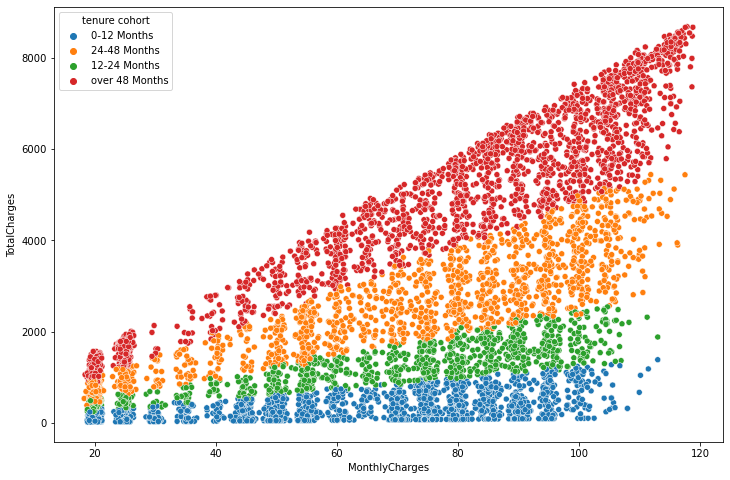

In [28]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df, hue='tenure cohort')

**TASK: Create a count plot showing the churn count per cohort.**

<AxesSubplot:xlabel='tenure cohort', ylabel='count'>

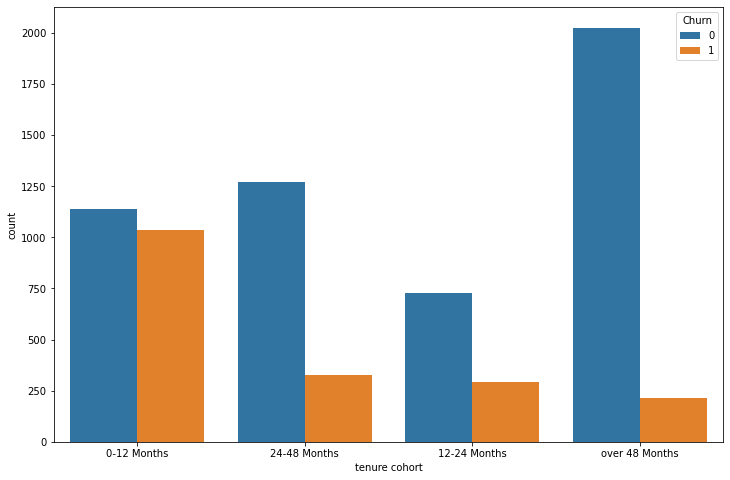

In [29]:
plt.figure(figsize=(12,8))
sns.countplot(x='tenure cohort', data=df, hue='Churn')

**TASK: Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

In [30]:
#CODE HERE

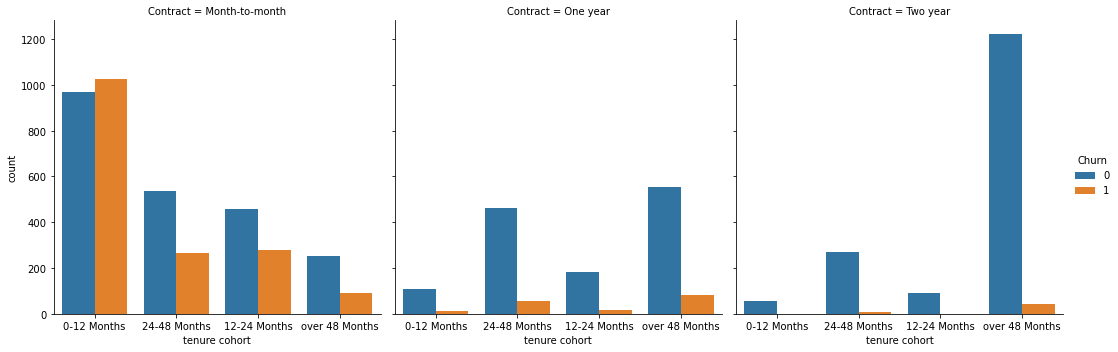

In [31]:
sns.catplot(kind='count', x="tenure cohort", hue='Churn', col='Contract', data=df);

-----

# Part 4: Predictive Modeling

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting. Feel free to add any other supervised learning models to your comparisons!**


## Single Decision Tree

**TASK : Separate out the data into X features and Y label. Create dummy variables where necessary and note which features are not useful and should be dropped.**

In [32]:
X = df.drop(['Churn', 'customerID', 'tenure cohort'], axis=1)
y = df['Churn']

In [33]:
X = pd.get_dummies(data=X, drop_first=True)

In [34]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


**TASK: Perform a train test split, holding out 10% of the data for testing. We'll use a random_state of 101 in the solutions notebook/video.**

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**TASK: Decision Tree Perfomance. Complete the following tasks:**
   1. Train a single decision tree model (feel free to grid search for optimal hyperparameters).
   2. Evaluate performance metrics from decision tree, including classification report and plotting a confusion matrix.
   2. Calculate feature importances from the decision tree.
   4. OPTIONAL: Plot your tree, note, the tree could be huge depending on your pruning, so it may crash your notebook if you display it with plot_tree.

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [38]:
base = DecisionTreeClassifier()

In [39]:
param_grid = {'max_features':[None,4,8], 'max_depth':[4,6,8,15], 'criterion':['gini', 'entropy']}

In [40]:
grid = GridSearchCV(base, param_grid)

In [41]:
grid.fit(X_train, y_train);

In [42]:
y_pred = grid.predict(X_test)

In [43]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1024
           1       0.68      0.48      0.56       383

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.71      1407
weighted avg       0.78      0.80      0.78      1407



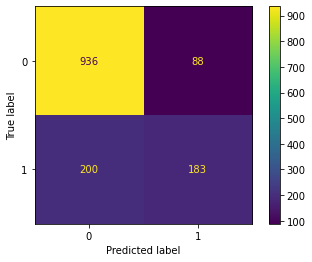

In [45]:
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test)

In [46]:
feature_importances = pd.DataFrame(index=X.columns ,data=grid.best_estimator_.feature_importances_, columns=['feature importances'])
feature_importances = feature_importances.sort_values(by='feature importances')

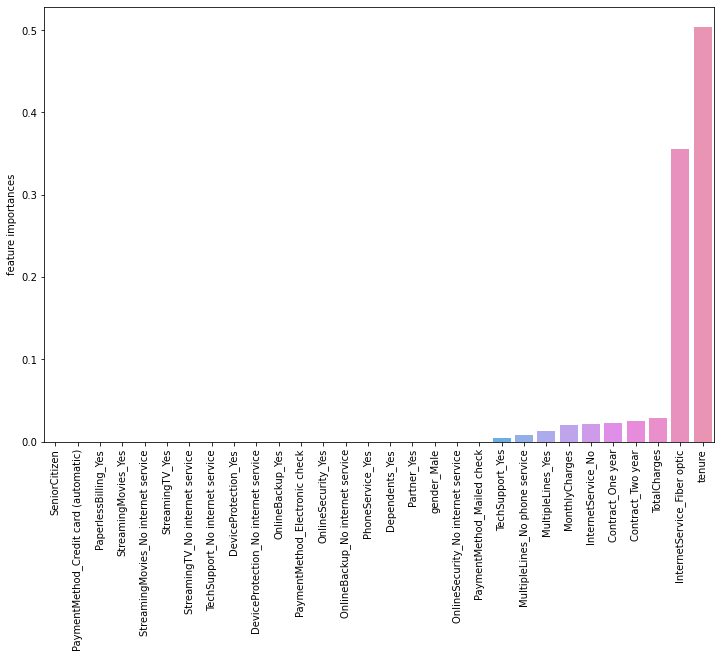

In [47]:
plt.figure(figsize=(12,8))
sns.barplot(x=feature_importances.index, y=feature_importances['feature importances'])
plt.xticks(rotation=90);

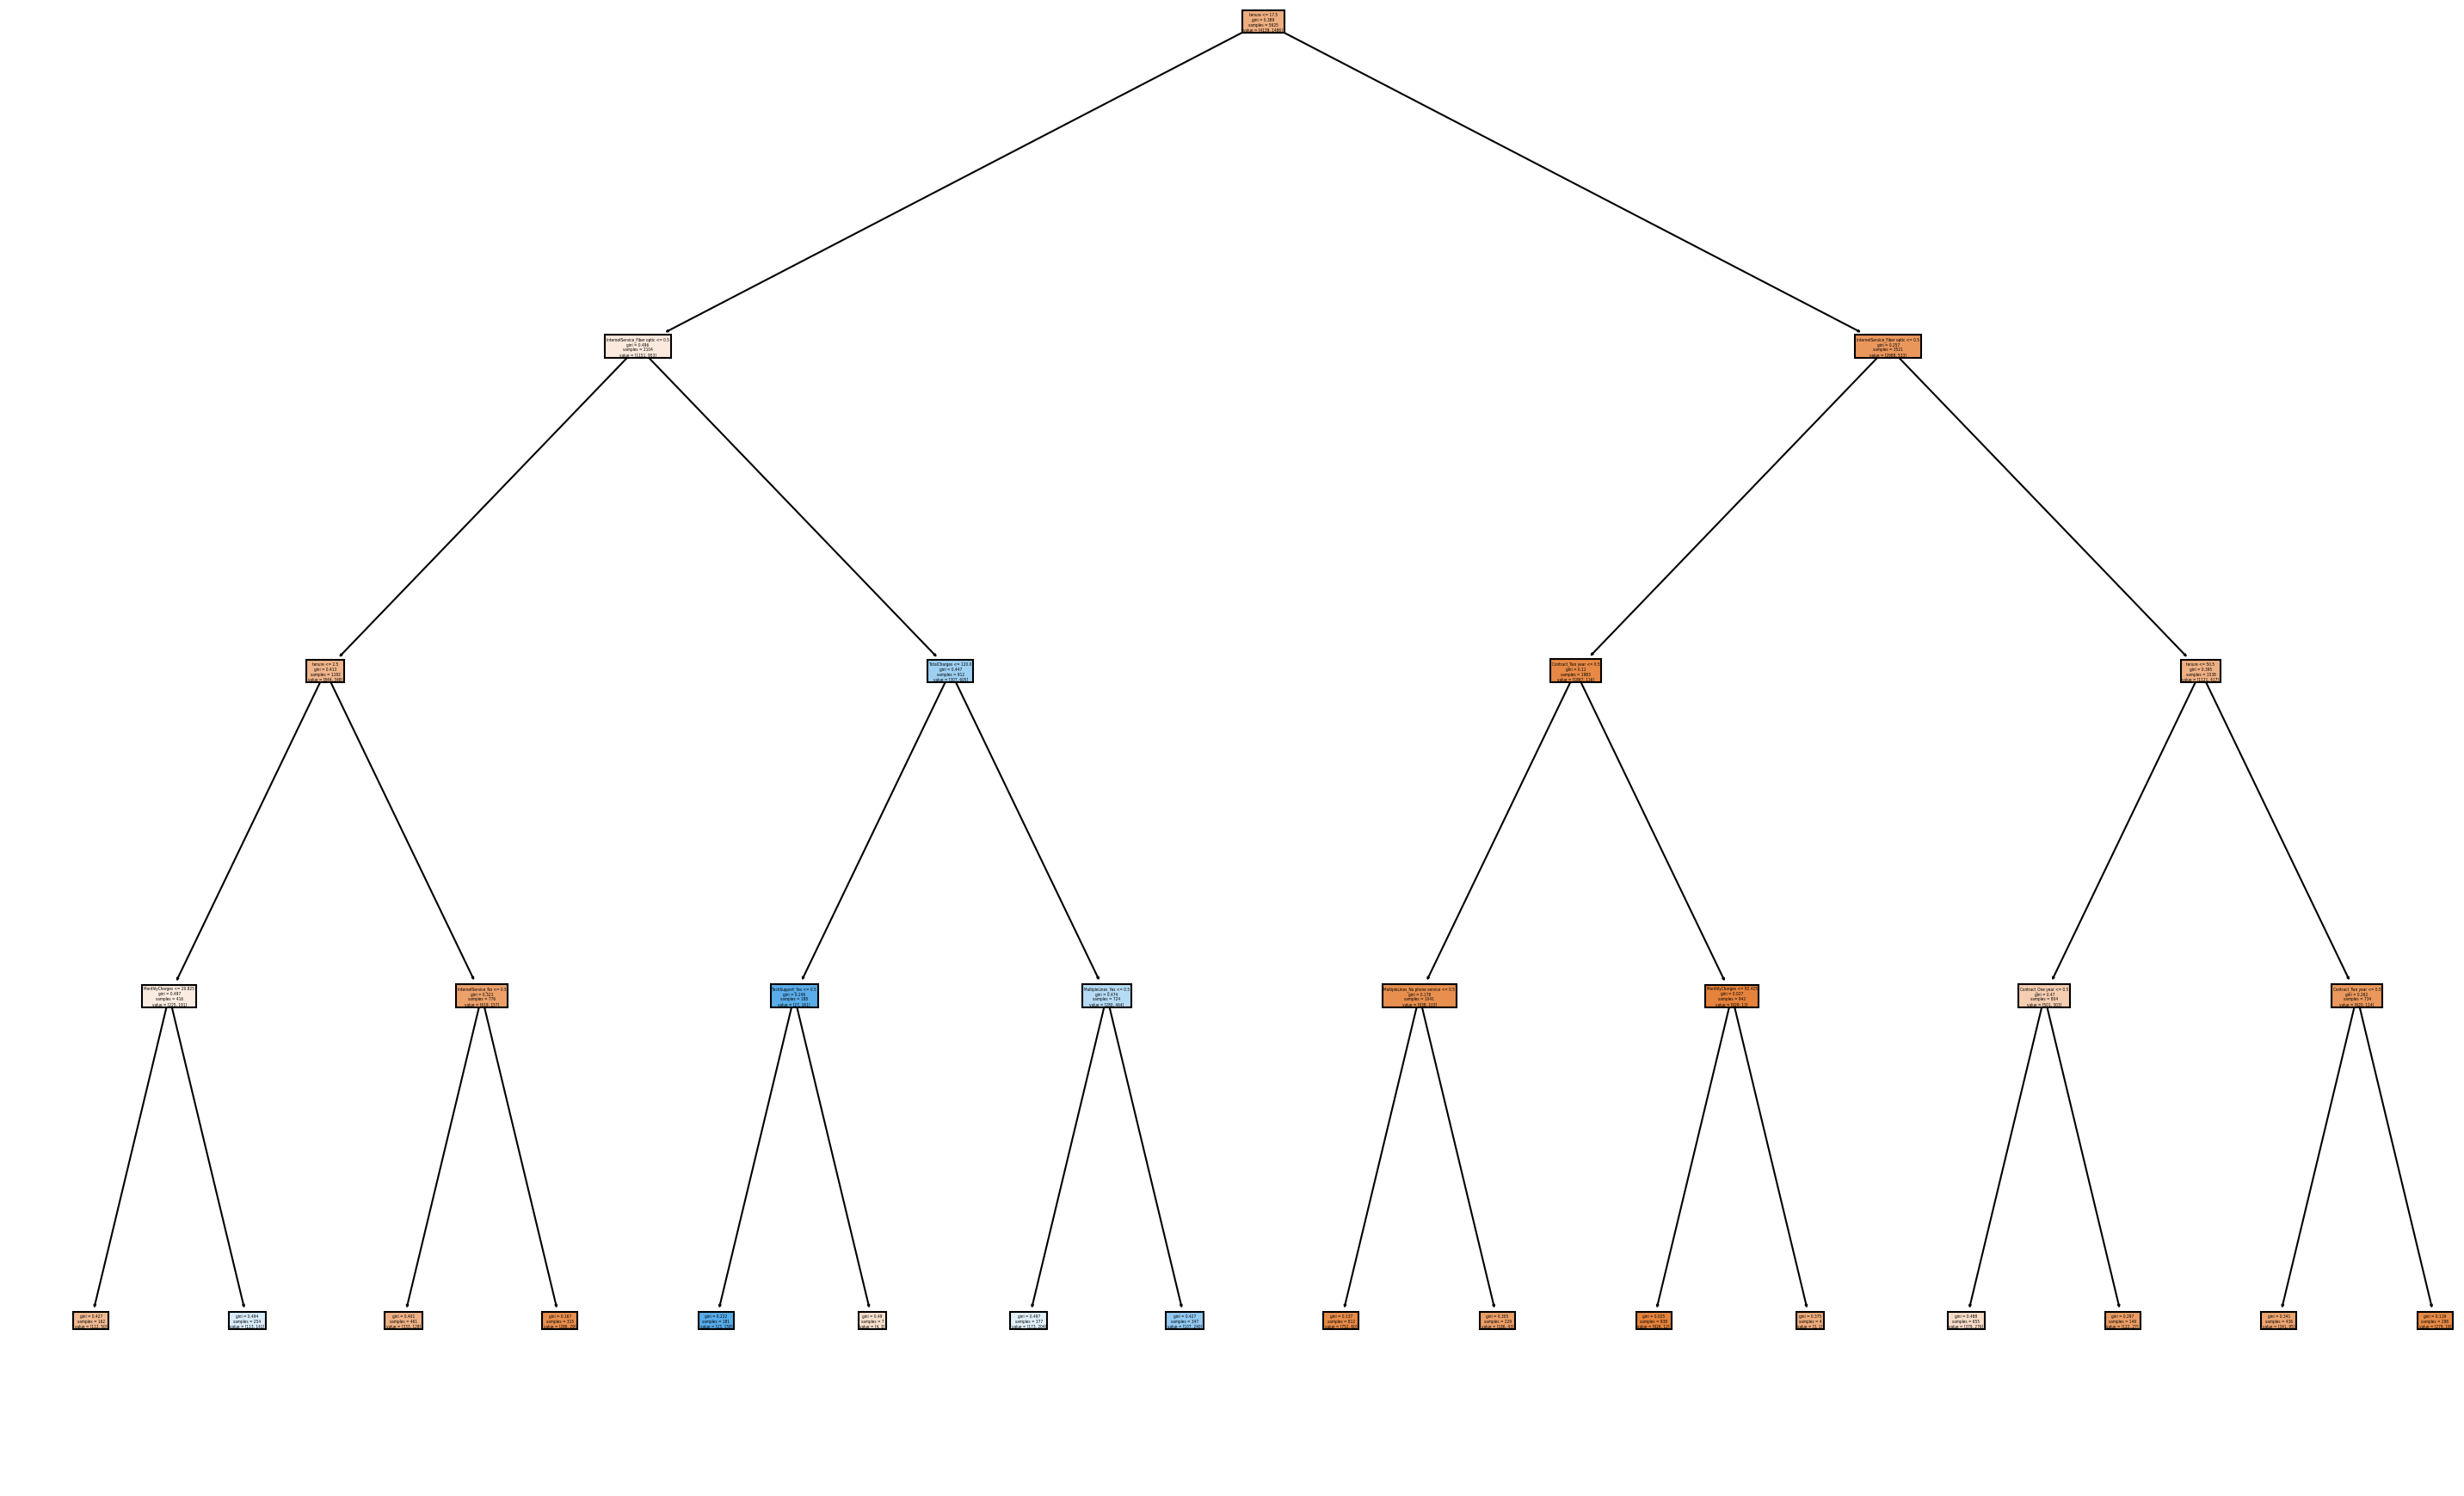

In [48]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8),dpi=150)
plot_tree(grid.best_estimator_,filled=True,feature_names=X.columns);

## Random Forest

**TASK: Create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [49]:
#CODE HERE
base = RandomForestClassifier(n_jobs=2)

In [50]:
param_grid = {'n_estimators':[50,100,150], 'max_depth':[4,6,8,15], 'bootstrap':[True, False], 'oob_score': [True, False]}

In [51]:
grid = GridSearchCV(base, param_grid)

In [52]:
grid.fit(X_train, y_train);

C:\Users\wanke\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\wanke\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\wanke\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\wanke\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\wanke\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\wanke\anaconda3\lib\site-packages\sklearn\base.py:4

C:\Users\wanke\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\wanke\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\wanke\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\wanke\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\wanke\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\wanke\anaconda3\lib\site-packages\sklearn\base.py:4

In [53]:
y_pred = grid.predict(X_test)

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.87      1024
           1       0.72      0.48      0.57       383

    accuracy                           0.81      1407
   macro avg       0.77      0.70      0.72      1407
weighted avg       0.80      0.81      0.79      1407



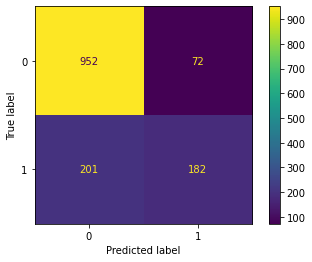

In [55]:
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test)

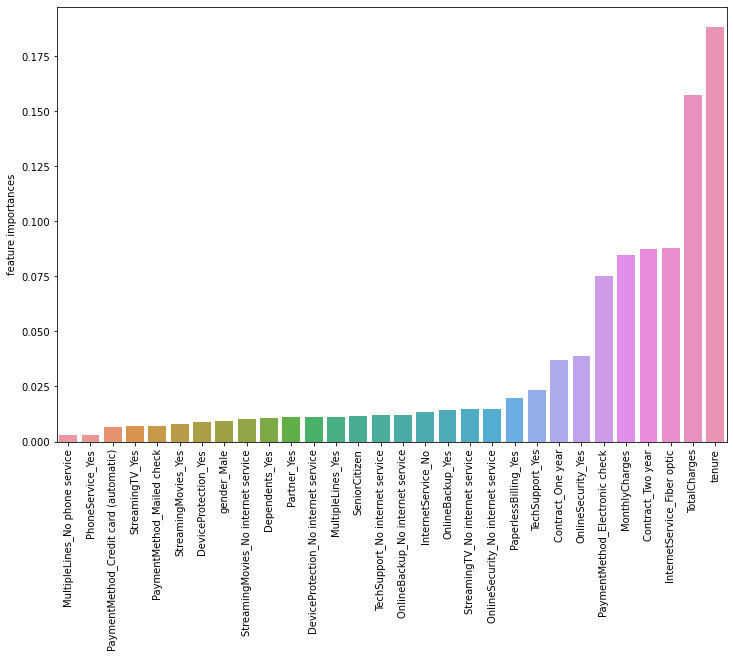

In [56]:
feature_importances = pd.DataFrame(index=X.columns ,data=grid.best_estimator_.feature_importances_, columns=['feature importances'])
feature_importances = feature_importances.sort_values(by='feature importances')

plt.figure(figsize=(12,8))
sns.barplot(x=feature_importances.index, y=feature_importances['feature importances'])
plt.xticks(rotation=90);

## Boosted Trees

**TASK: Use AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results**

In [57]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

In [58]:
param_grid = {'n_estimators':[50,100,150], 'learning_rate':[0.3,0.6,1,2]}

In [59]:
grid_ada = GridSearchCV(ada, param_grid, n_jobs=2)

In [60]:
grid_ada.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=2,
             param_grid={'learning_rate': [0.3, 0.6, 1, 2],
                         'n_estimators': [50, 100, 150]})

In [61]:
grid_ada.best_score_

0.8037333333333333

In [62]:
y_pred = grid.predict(X_test)

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.87      1024
           1       0.72      0.48      0.57       383

    accuracy                           0.81      1407
   macro avg       0.77      0.70      0.72      1407
weighted avg       0.80      0.81      0.79      1407



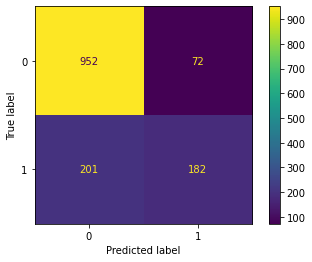

In [64]:
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test)

**TASK: Analyze your results**

There are some important things to point out:
We can see that the overall accuracy of the different models is roughly the same. For us the predictions of people who are likely to churn are most important. This means the recall of the 1 class is the most important. We want to provide bonuses to those customer in order to convince them to stay with us. Particular this metric does not perform very well. This is also due to the different total number of rows for each class (churn yes is not so prominent). Overall, it can be said that the different tree models perform similar and it is probably worthwhile to look into other types of models like SVM or Logistic Regression.